# Project 3, APS1070 Summer 2020
#### **PCA -  20 points**
**Deadline: July 12, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Matthew C. McFee
*   **Student number**: 1005449631



In this project we are working on an up-to-date COVID19 dataset. The dataset reports the number of total cases for different countries at the end of each day.

Data url: https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv


In [ ]:
import pandas as pd
rawdf = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv',
    index_col=0,
    thousands=','
)

# Part 1: Geting started [4 Marks]

1. Plot time-series for the `US`, `China`, ` Canada`, and 17 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country.
2. Apply `StandardScalar` to the dataframe. Each day should have a `mean` of zero and `StD` of 1.
3. Plot the standardized time-series for the same countries in `step 1`.
4. Explain the trend of standardized time-series for the `US`, `Canada`, and `China`. Why does the curve goes up or down? What do negative and positive values mean? 
5. What other patterns do you see in other countries? (e.g., oscillations, monotonic increase or decrease, other trends)

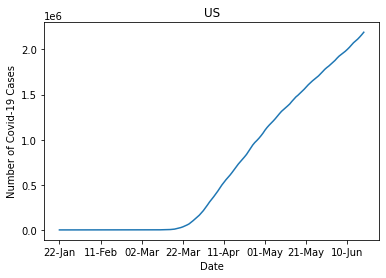

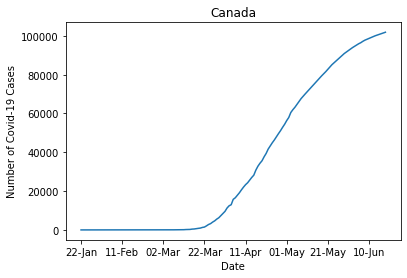

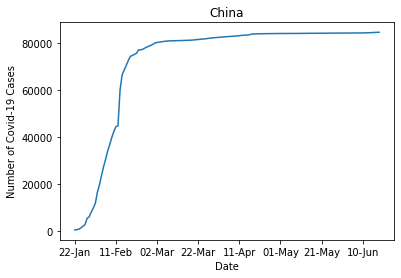

In [ ]:
# Question 1: Plot time series for the US, China, Canada and 17 other countries
import matplotlib.pyplot as plt

def plot_time_series(df, countries_list):
  for country in countries_list:
    plt.figure()
    df.loc[country].plot(x_compat=True)
    plt.title(country)
    plt.xlabel("Date")
    plt.ylabel("Number of Covid-19 Cases")

main_countries = ["US", "Canada", "China"]

_ = plot_time_series(rawdf, main_countries)

# other_countries = rawdf_fix.columns[0:17]

# _ = plot_time_series(rawdf_fix, other_countries)




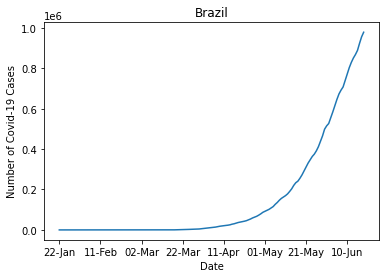

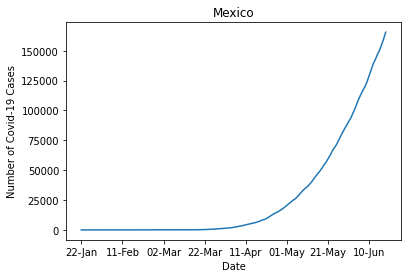

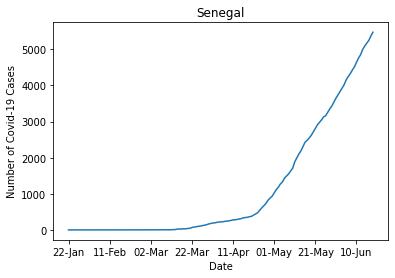

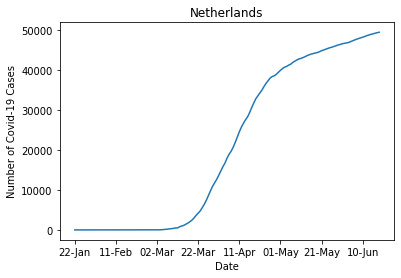

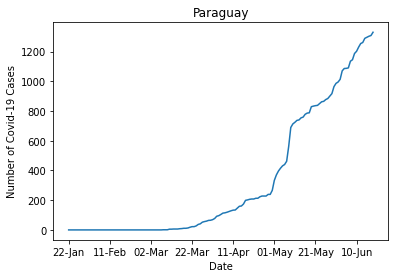

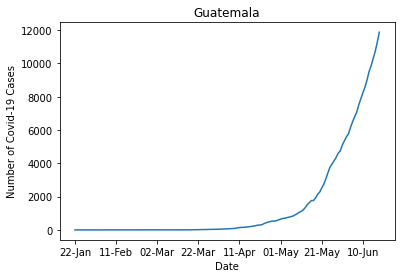

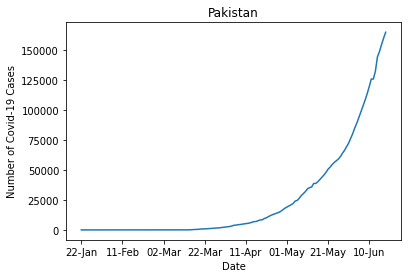

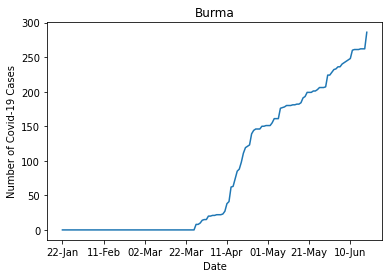

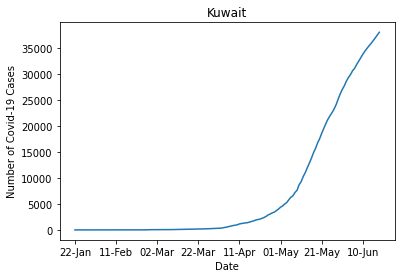

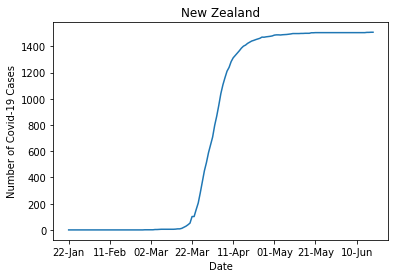

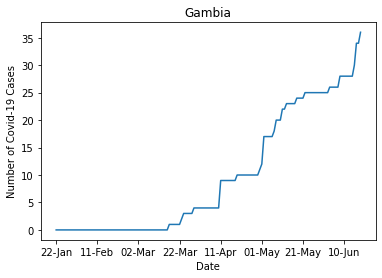

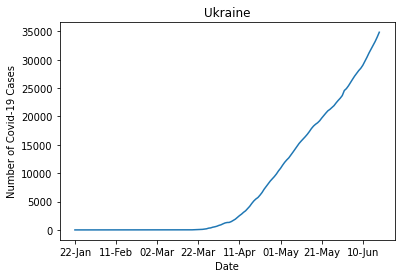

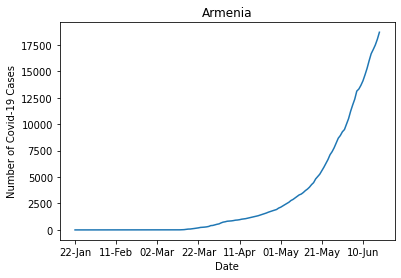

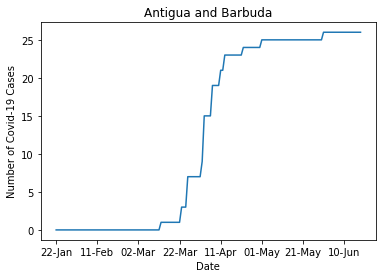

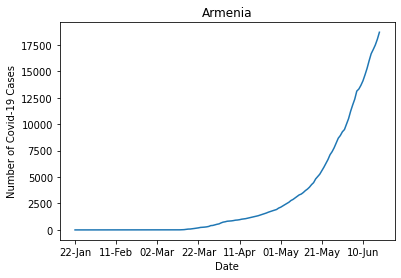

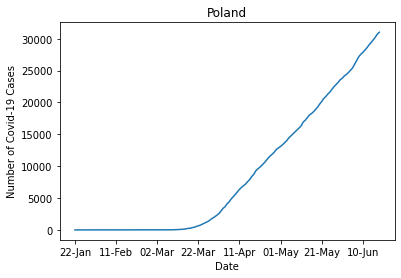

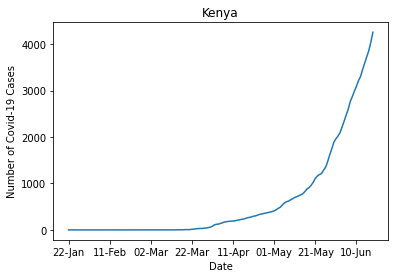

In [ ]:
# Question 1: continued...

# Going to try 17 random countries out of curiosity 
# of infections

import random

rawdf_fix = rawdf.transpose()

random_countries = random.choices(rawdf_fix.columns, k=17)

_ = plot_time_series(rawdf, random_countries)

It appears most countries are sharply rising in the number of COVID-19 cases, with some countries appearing to "level" out.

In [ ]:
# Question 2: Apply standard scaler to the data set 

from sklearn.preprocessing import StandardScaler

# Initialize an instance of the StandardScaler class

sc = StandardScaler()

df_std = sc.fit_transform(rawdf)

df_std = pd.DataFrame(df_std, columns=rawdf.columns, index=rawdf.index)

df_std.head()

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,10-May,11-May,12-May,13-May,14-May,15-May,16-May,17-May,18-May,19-May,20-May,21-May,22-May,23-May,24-May,25-May,26-May,27-May,28-May,29-May,30-May,31-May,01-Jun,02-Jun,03-Jun,04-Jun,05-Jun,06-Jun,07-Jun,08-Jun,09-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.074065,-0.074383,-0.074803,-0.07459,-0.074649,-0.074404,-0.074048,-0.074081,-0.073967,-0.074064,-0.074036,-0.073821,-0.073742,-0.073701,-0.07365,-0.073625,-0.073733,-0.073738,-0.07372,-0.073835,-0.073816,-0.073885,-0.073707,-0.073711,-0.07379,-0.073868,-0.073962,-0.074042,-0.07413,-0.074221,-0.074359,-0.074624,-0.07497,-0.075116,-0.075417,-0.075928,-0.076767,-0.077701,-0.079006,-0.080565,...,-0.167578,-0.166286,-0.165144,-0.164284,-0.162049,-0.160017,-0.158507,-0.157815,-0.155962,-0.153093,-0.150931,-0.148637,-0.146459,-0.142377,-0.139855,-0.137162,-0.134251,-0.131952,-0.130218,-0.128255,-0.124813,-0.122453,-0.120897,-0.118080,-0.115991,-0.113427,-0.110232,-0.109182,-0.106720,-0.105421,-0.104716,-0.103368,-0.101755,-0.100432,-0.099910,-0.099004,-0.097206,-0.095510,-0.096015,-0.095060
Albania,-0.074065,-0.074383,-0.074803,-0.07459,-0.074649,-0.074404,-0.074048,-0.074081,-0.073967,-0.074064,-0.074036,-0.073821,-0.073742,-0.073701,-0.07365,-0.073625,-0.073733,-0.073738,-0.07372,-0.073835,-0.073816,-0.073885,-0.073707,-0.073711,-0.07379,-0.073868,-0.073962,-0.074042,-0.07413,-0.074221,-0.074359,-0.074624,-0.07497,-0.075294,-0.075593,-0.076104,-0.076941,-0.077876,-0.079179,-0.080737,...,-0.201516,-0.202387,-0.203189,-0.204105,-0.204643,-0.205328,-0.205908,-0.206717,-0.207548,-0.208739,-0.209576,-0.210500,-0.211467,-0.212448,-0.213366,-0.214201,-0.215032,-0.216153,-0.217113,-0.218013,-0.218969,-0.219992,-0.221070,-0.221804,-0.223144,-0.224075,-0.224871,-0.225703,-0.226769,-0.227645,-0.228416,-0.229153,-0.229857,-0.230293,-0.230836,-0.231866,-0.232412,-0.232575,-0.233693,-0.233932
Algeria,-0.074065,-0.074383,-0.074803,-0.07459,-0.074649,-0.074404,-0.074048,-0.074081,-0.073967,-0.074064,-0.074036,-0.073821,-0.073742,-0.073701,-0.07365,-0.073625,-0.073733,-0.073738,-0.07372,-0.073835,-0.073816,-0.073885,-0.073707,-0.073711,-0.07379,-0.073868,-0.073962,-0.074042,-0.07413,-0.074221,-0.074359,-0.074624,-0.07497,-0.075294,-0.075417,-0.075928,-0.076767,-0.077701,-0.079006,-0.080565,...,-0.154893,-0.154893,-0.154867,-0.154873,-0.154835,-0.154936,-0.154876,-0.154779,-0.154875,-0.155384,-0.155856,-0.156246,-0.156706,-0.157038,-0.157313,-0.157390,-0.157688,-0.158520,-0.159563,-0.160592,-0.161750,-0.162743,-0.163670,-0.164605,-0.166186,-0.167402,-0.168555,-0.169615,-0.170768,-0.171664,-0.172684,-0.173865,-0.175030,-0.175825,-0.176784,-0.178150,-0.179085,-0.179865,-0.181440,-0.182162
Andorra,-0.074065,-0.074383,-0.074803,-0.07459,-0.074649,-0.074404,-0.074048,-0.074081,-0.073967,-0.074064,-0.074036,-0.073821,-0.073742,-0.073701,-0.07365,-0.073625,-0.073733,-0.073738,-0.07372,-0.073835,-0.073816,-0.073885,-0.073707,-0.073711,-0.07379,-0.073868,-0.073962,-0.074042,-0.07413,-0.074221,-0.074359,-0.074624,-0.07497,-0.075294,-0.075593,-0.076104,-0.076941,-0.077876,-0.079179,-0.080737,...,-0.202601,-0.203494,-0.204288,-0.205205,-0.205874,-0.206695,-0.207399,-0.208299,-0.209123,-0.210300,-0.211225,-0.212162,-0.213196,-0.214214,-0.215176,-0.216026,-0.217021,-0.218272,-0.219387,-0.220407,-0.221484,-0.222578,-0.223662,-0.223967,-0.225363,-0.226340,-0.227196,-0.228120,-0.229246,-0.230201,-0.231159,-0.232110,-0.233032,-0.233597,-0.234370,-0.235684,-0.236574,-0.237126,-0.238444,-0.238965
Angola,-0.074065,-0.074383,-0.074803,-0.07459,-0.074649,-0.074404,-0.074048,-0.074081,-0.073967,-0.074064,-0.074036,

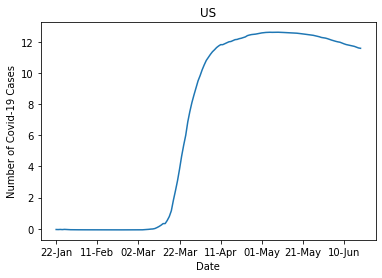

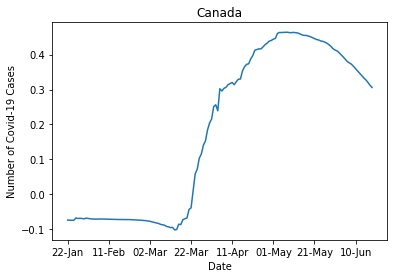

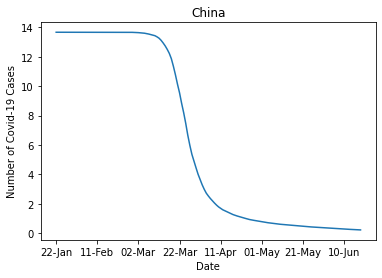

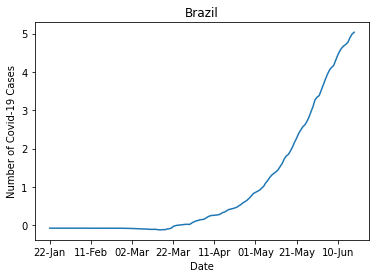

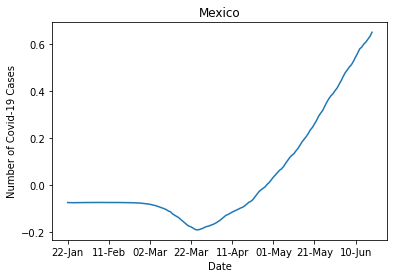

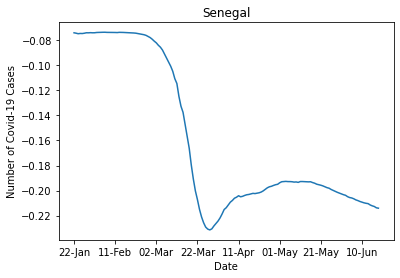

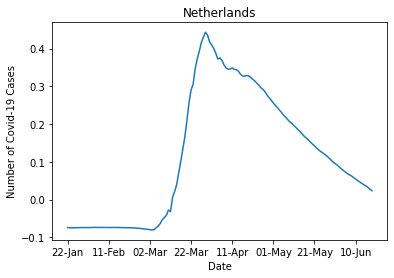

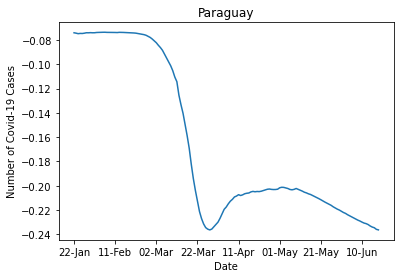

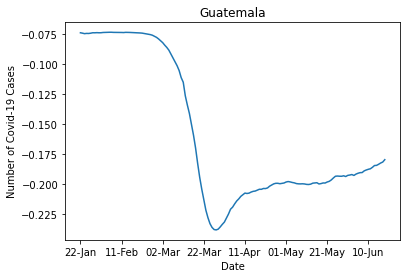

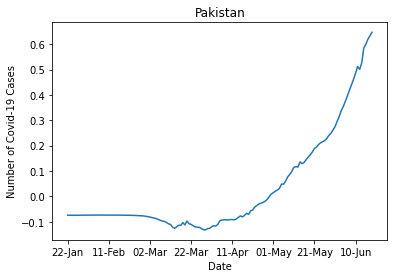

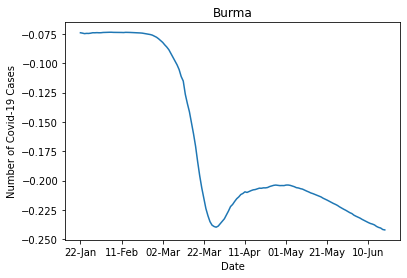

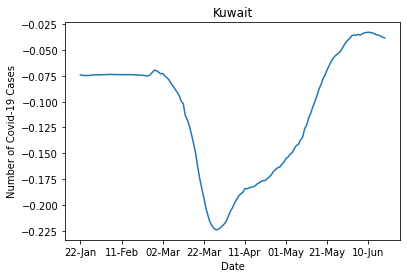

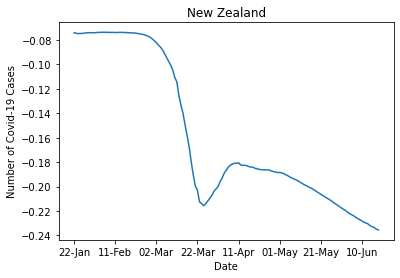

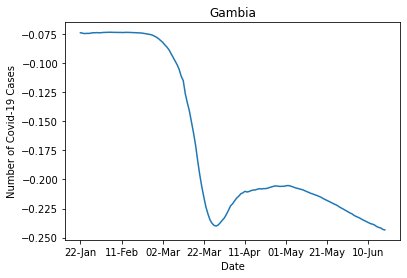

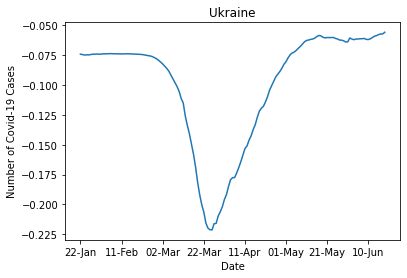

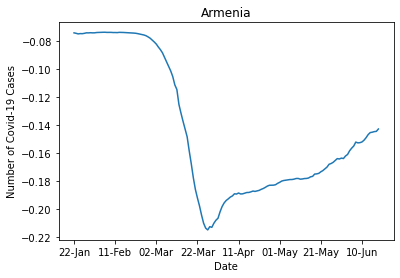

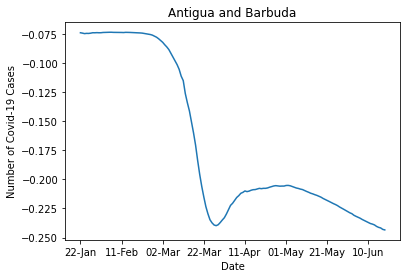

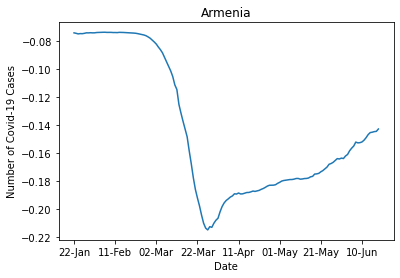

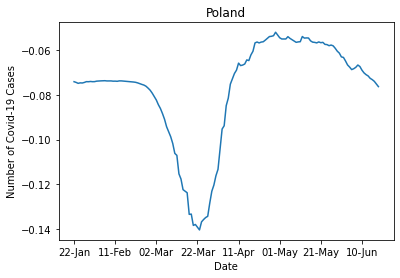

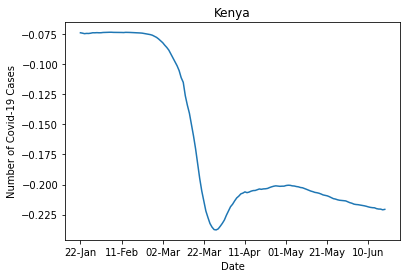

In [ ]:
# Question 3: Plot the time series data with the countries used in the previous
# question

lists_of_countries = [main_countries, random_countries]

for country_list in lists_of_countries:
  _ = plot_time_series(df_std, country_list)

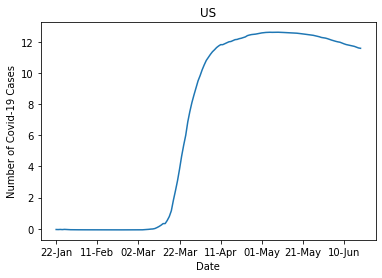

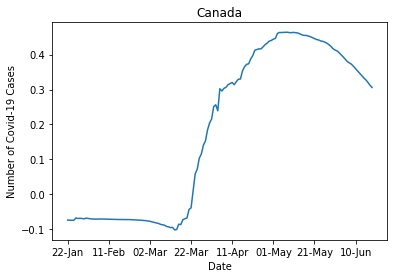

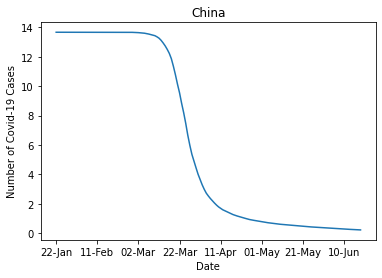

In [ ]:
# Question 4: Explain the trends in the graphs for USA, Canada, and China. What 
# do the positive and negative values mean?

# Replotting so I can see these plots as I write
_ = plot_time_series(df_std, main_countries)

As in the graphs that are not standardized the slopes of the lines indicate increases or decreases in the number of COVID-19 cases (now relative to the global average for any given day). The standardization puts all of the countries on the same scale, for example China had case numbers many orders higher than the other nations. In standardized data, the positive and negative values indicate whether or not that particular data point is above or below average. In this case, the value indicates if the number of cases for any particular date was above or below the mean cases for that given day. If the country had a number of cases equal to the mean, the standardized value would be 0. The trends seen in the data are more informative, as we can see how a countries cases are going up or down, in the context of the average of all countries on a given day. 

**Question 5: What kind of trends are exhibited by other countries etc.?**

For the US and Canada, the standardized # of cases increased sharply and then the US leveled off and Canada began decreasing. This indicates that there was a sharp rise in the number of COVID-19 cases (propelling the countries well above the global average for each given day) but the countries implemented measures to stabilize the number of cases. In contrast, China started off with a large number of cases and then decreased and leveled off at 0, indicating they have managed the epidemic. Other countries experienced sharp increases, decreases, or even small spikes in number of cases even though the country was consistently decreasing (eg. Luxembourg). 

# Part 2: Applying PCA [6 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your Cov matrix should be (149, 149).*
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`.
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. How many PCs do you need to cover 99\% of the dataset's variance?
4. Show the first 10 principal components (Eigenvectors) plotted as a time series.
5. Based on your knowledge of the dataset contents, can you explain what any of the principal components might represent?

In [ ]:
# Question 1: Compute the covariance of the dataframe
df_std = sc.fit_transform(rawdf)

df_std = pd.DataFrame(df_std, columns=rawdf.columns, index=rawdf.index)

df_cov = df_std.cov()

# Check the problem hint 

print(df_cov.shape) # passed

df_cov.head(5)

(149, 149)


,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,10-May,11-May,12-May,13-May,14-May,15-May,16-May,17-May,18-May,19-May,20-May,21-May,22-May,23-May,24-May,25-May,26-May,27-May,28-May,29-May,30-May,31-May,01-Jun,02-Jun,03-Jun,04-Jun,05-Jun,06-Jun,07-Jun,08-Jun,09-Jun,10-Jun,11-Jun,12-Jun,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun
22-Jan,1.005348,1.005341,1.005334,1.005336,1.005339,1.005339,1.005341,1.005339,1.005339,1.005340,1.005340,1.005338,1.005337,1.005337,1.005336,1.005336,1.005334,1.005334,1.005334,1.005330,1.005330,1.005327,1.005329,1.005328,1.005325,1.005321,1.005315,1.005308,1.005300,1.005300,1.005301,1.005295,1.005277,1.005253,1.005232,1.005177,1.005047,1.004839,1.004456,1.003999,...,0.045470,0.044544,0.043545,0.042583,0.041441,0.040382,0.039394,0.038628,0.037782,0.036938,0.036046,0.035117,0.034234,0.033446,0.032717,0.032077,0.031403,0.030718,0.029915,0.029112,0.028285,0.027648,0.027105,0.026437,0.025729,0.025051,0.024323,0.023669,0.023129,0.022641,0.022056,0.021438,0.020813,0.020227,0.019672,0.019175,0.018709,0.018155,0.017515,0.016999
23-Jan,1.005341,1.005348,1.005341,1.005339,1.005339,1.005338,1.005338,1.005336,1.005335,1.005336,1.005336,1.005334,1.005333,1.005333,1.005332,1.005331,1.005329,1.005330,1.005330,1.005325,1.005326,1.005323,1.005325,1.005323,1.005320,1.005317,1.005310,1.005303,1.005295,1.005295,1.005295,1.005288,1.005269,1.005244,1.005222,1.005167,1.005034,1.004824,1.004438,1.003978,...,0.045170,0.044244,0.043245,0.042284,0.041142,0.040084,0.039095,0.038329,0.037483,0.036639,0.035747,0.034819,0.033936,0.033148,0.032420,0.031779,0.031105,0.030421,0.029618,0.028816,0.027989,0.027352,0.026809,0.026142,0.025434,0.024757,0.024029,0.023375,0.022836,0.022348,0.021763,0.021146,0.020522,0.019936,0.019381,0.018884,0.018418,0.017865,0.017226,0.016709
24-Jan,1.005334,1.005341,1.005348,1.005343,1.005339,1.005336,1.005334,1.005332,1.005329,1.005331,1.005330,1.005326,1.005325,1.005325,1.005324,1.005323,1.005321,1.005322,1.005321,1.005317,1.005318,1.005315,1.005316,1.005314,1.005311,1.005307,1.005300,1.005293,1.005285,1.005286,1.005286,1.005281,1.005263,1.005240,1.005219,1.005166,1.005036,1.004831,1.004453,1.003997,...,0.045962,0.045032,0.044030,0.043064,0.041918,0.040855,0.039862,0.039093,0.038243,0.037395,0.036500,0.035567,0.034679,0.033887,0.033155,0.032511,0.031833,0.031144,0.030340,0.029533,0.028702,0.028061,0.027515,0.026842,0.026133,0.025447,0.024714,0.024056,0.023513,0.023021,0.022432,0.021810,0.021181,0.020591,0.020032,0.019532,0.019062,0.018504,0.017859,0.017339
25-Jan,1.005336,1.005339,1.005343,1.005348,1.005344,1.005342,1.005340,1.005340,1.005337,1.005338,1.005336,1.005334,1.005333,1.005333,1.005332,1.005332,1.005329,1.005330,1.005330,1.005326,1.005326,1.005323,1.005325,1.005324,1.005320,1.005316,1.005309,1.005302,1.005294,1.005294,1.005293,1.005286,1.005266,1.005240,1.005218,1.005162,1.005028,1.004817,1.004431,1.003970,...,0.045270,0.044340,0.043339,0.042373,0.041228,0.040165,0.039173,0.038404,0.037555,0.036708,0.035814,0.034882,0.033996,0.033205,0.032474,0.031832,0.031155,0.030468,0.029666,0.028861,0.028033,0.027394,0.026849,0.026178,0.025472,0.024789,0.024060,0.023404,0.022863,0.022373,0.021786,0.021168,0.020541,0.019954,0.019397,0.018898,0.018431,0.017876,0.017234,0.016716
26-Jan,1.005339,1.005339,1.005339,1.005344,1.005348,1.005346,1.005343,1.005342,1.005341,1.005341,1.005341,1.005338,1.005337,1.005337,1.005336,1.005335,1.005333,1.005334,1.005333,1.005329,1.005330,1.005327,1.005328,1.005327,1.005324,1.005320,1.005313,1.005306,1.005298,1.005297,1.005297,1.005290,1.005270,1.005244,1.005222,1.005166,1.005032,1.004821,1.004435,1.003974,...,0.046134,0.045204,0.044203,0.043238,0.042094,0.041032,0.040040,0.039271,0.038422,0.037575,0.036680,0.035748,0.034862,0.034070,0.033339,0.032

In [ ]:
# Question 2: Compute the eigenvalues and eigenvectors using np.linalg.eigh

import numpy as np 

eigenvalues, eigenvectors = np.linalg.eigh(df_cov)

# print(eigenvalues)
# print(eigenvectors)

print("The number of eigenvalues and vectors is: ", len(eigenvalues))

The number of eigenvalues and vectors is:  149


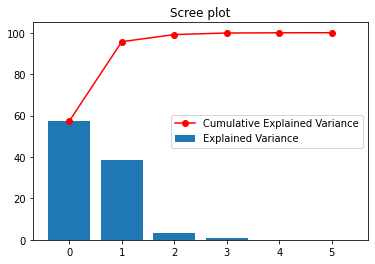

[57.30798402 95.64802942 99.08533258 99.83723201 99.94536905]


In [ ]:
# Question 3: Generate a scree plot and determine the number of principal \
# components to capture 99% of the variance

# I used tutorial #3's section on scree plot generation with minor modifications.
# No sense in reinventing the wheel here.

# Sort the eigenvectors as was done in Tutorial #3

# argsort() returns a list of indices which would sort the list
args = (-eigenvalues).argsort()
eigenvalues = eigenvalues[args]
eigenvectors = eigenvectors[:, args]

# Find the sum of eigenvalues to be the denominator of the fraction
eig_val_sum = sum(eigenvalues)

# This is a list comprehension calculating the fractional contribution of
# each eigen value to the eigenvalue sum
exp_var = [eig_value/eig_val_sum*100 for eig_value in eigenvalues]
cum_exp_var = np.cumsum(exp_var)

# Generate the graph showing the fractional contribution of each eigenvalue as
# a bar, and a line graph for the cumulative explained variance
plt.bar(range(6), exp_var[0:6], label='Explained Variance')
plt.plot(cum_exp_var[0:6], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.title("Scree plot")
plt.show()

print(cum_exp_var[0:5])

The graph indicates that having at least 3 principal components will result in capturing 99% of explained variance. Checking the cum_exp_var list confirms that by 3 PC we have ~99.09%.

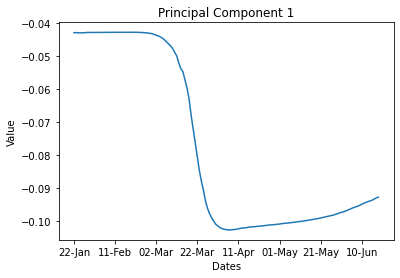

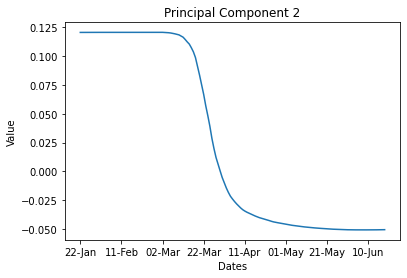

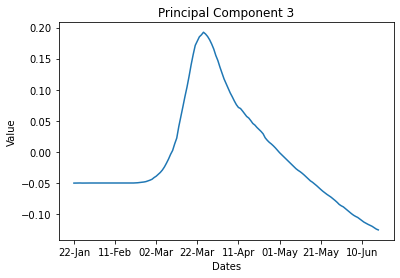

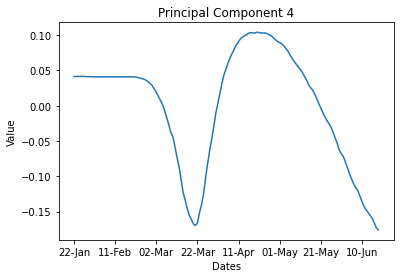

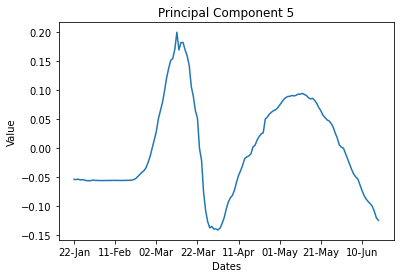

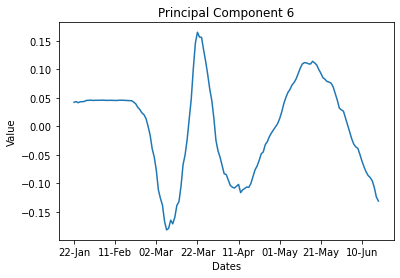

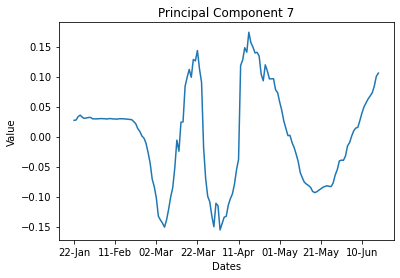

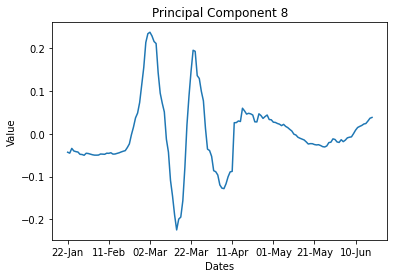

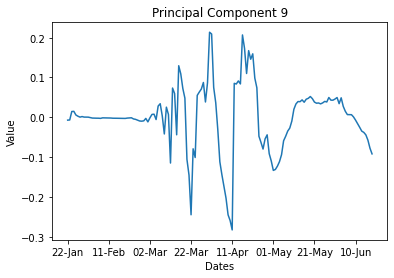

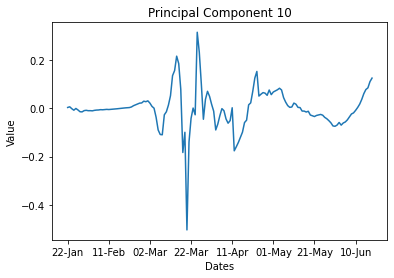

In [ ]:
# Question 4: Show the first 10 PCA plotted as time series

# Make a data frame of the eigenvectors with the same index 

top_10 = eigenvectors[:,0:10]

top_10_df = pd.DataFrame(top_10, index=rawdf.columns)

for index, column in enumerate(top_10_df.columns):
  top_10_df[column].plot(x_compat=True)
  label = index + 1
  plt.title("Principal Component " + str(label))
  plt.xlabel("Dates")
  plt.ylabel("Value")
  plt.show()

**Question 5: Provide an  interpretation of what these eigenvectors represent**

This problem can be interpreted in a similar way to the eigenfaces we discussed in class and tutorial. Each of the eigenvectors can be thought of as a particular global COVID-19 cases state. So, each row is still a country, and the corresponding eigenvector value is the number of cases. We then use this matrix of eigenvectors to project to a lower dimensional space allowing for more efficient machine learning analysis. When we are using our projection matrix to transfer our projected vectors back to the original dimensional space, we are taking some linear combination of our global COVID-19 cases states to reconstruct our original vector. This is similar to how engineers use Fourier transforms. The combination of our base "signals" reconstructs our original vector or "signal." It also looks like the higher number PC are modelling noise.

# Part 3: Data reconstruction [6 Marks]

Implement a function that:


*   Accepts a country name as an input
*   Plots the standardized time-series for it. 
*   Shows the incremental reconstruction for the first 10 principal components (10 plots each showing the standard time-series and your reconstruction). 
*   For each incremental reconstruction step, plots the residual error of reconstruction compared to the original sample (standardized time-series) and a title that states the RMSE of the reconstruction.
* Computes how many PCs are needed so that RMSE would be less than 1\% of data reconstruction with only the first principal component. (e.g., if the RMSE for the first principal component is 4000, we want to know how many PC we need so that RMSE would be less than 40.)

To summarize, your function should print $1+10+10=21$ plots, and report the number of PCs to get less than 1\% RMSE error.

Test your function with the `US`, `Canada`, and `China`.



In [ ]:
def plot_country_and_reconstruct(df, country):

  # Plot the standardized time series 
  df.loc[country,:].plot(x_compat=True)
  plt.title("Time Series for " + country)
  plt.xlabel("Dates")
  plt.ylabel("Standardized # of Covid-19 Cases")
  plt.show()

  # Find the PCA

  df_cov = df.cov()

  eigenvalues, eigenvectors = np.linalg.eigh(df_cov)

  # Find the top 10 eigenvalues and vectors

  args = (-eigenvalues).argsort()
  eigenvalues = eigenvalues[args]
  eigenvectors = eigenvectors[:, args]

  top_10_eigenv = eigenvectors[0:10]

  country_data = df.loc[country, :].values

  rmse = []

  for i in range(1, 11):

    # Project the vector down to the lower dimensional space

    # Projection matrix with i components
    W = eigenvectors[:, 0:i]

    # For some reason loc can't find any of the indices and says they
    # are invalid keys
    projection = np.dot(country_data, W)

    # Project the projection back to the higher dimensional space
    # to reconstruct the original vector
    reconstruction = np.dot(projection, W.T)

    # Plot the original time series and reconstruction
    df.loc[country].plot(x_compat=True, label="Original")
    #plt.plot(df.transpose().index, df.loc[country].values, label="Original")
    plt.plot(df.transpose().index, reconstruction, "r--", label="Reconstruction")
    plt.title("Reconstruction with " + str(i) + " PCA Components")
    plt.xlabel("Dates")
    plt.ylabel("# of Covid Cases (Standardized)")
    plt.legend()
    plt.show()

    # Calculate reconstruction error
    # Chance this to subtract
    error = (reconstruction - df.loc[country].values)
    error_series = pd.Series(error, index=df_std.columns)

    # Plot reconstruction error
    #df_trans[country].plot(x_compat=True, color="w")
    error_series.plot(color="g")
    #plt.plot(df_trans.index, error, "g-")
    plt.title("Reconstruction Error vs. Date for " + str(i) + " PC")
    plt.xlabel("Dates")
    plt.ylabel("Reconstruction Error")
    plt.show()

    error = (reconstruction - df.loc[country].values)**2

    # Store the RMSE
    rmse.append(np.sqrt(np.sum(error)/len(reconstruction)))
  
  # Find the # of PC needed to reach goal RMSE 

  target = 0.01*rmse[0]

  rmse_bool = rmse <= target

  # Intialize to the case that every value in list is False

  # Find the indices of the true values in the lists via a list comprehension
  true_indx = [i for i, value in enumerate(rmse_bool) if value]

  # Return the number of PC components needed (index+1) and have a case
  # that returns more than 10 PC needed if all values in the list are False
  if not true_indx:
    rmse_value = "More than 10 PC needed"
  else:
    rmse_value = true_indx[0] + 1

  return rmse_value

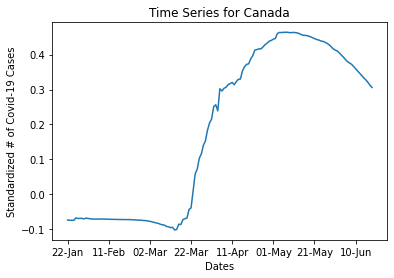

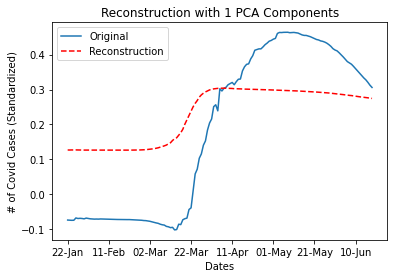

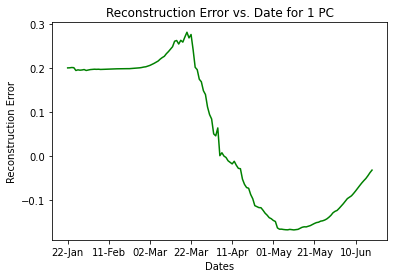

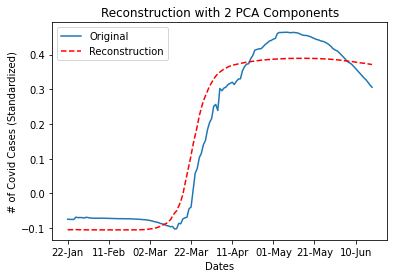

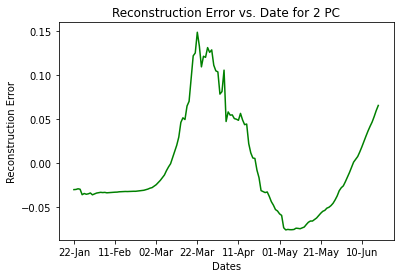

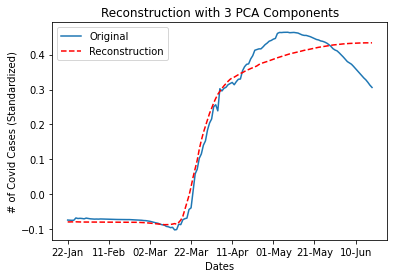

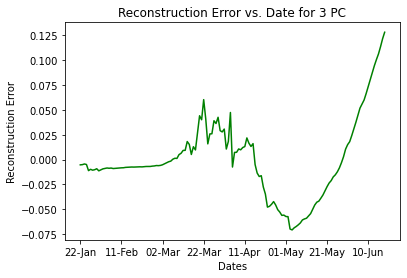

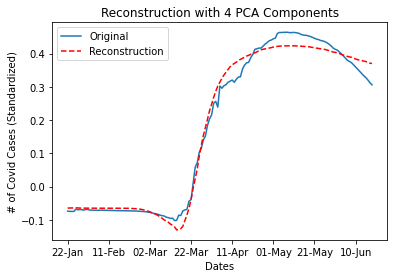

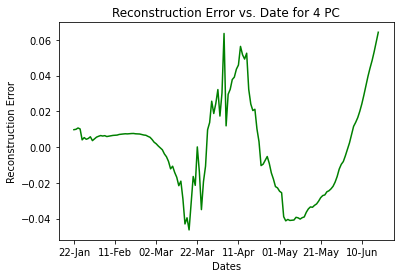

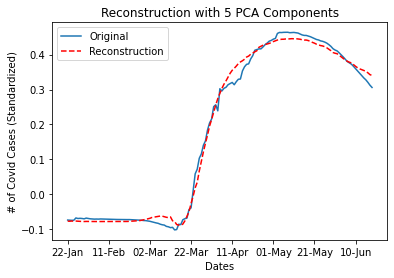

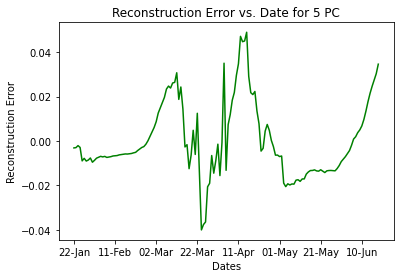

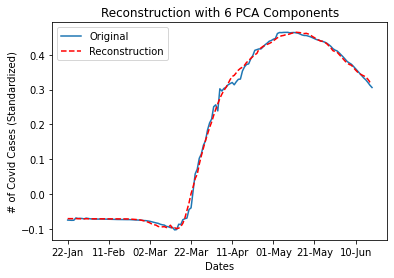

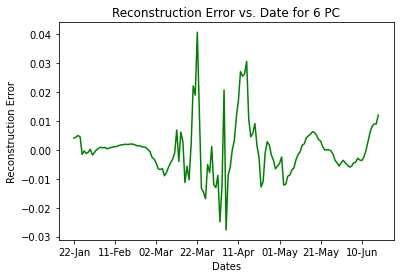

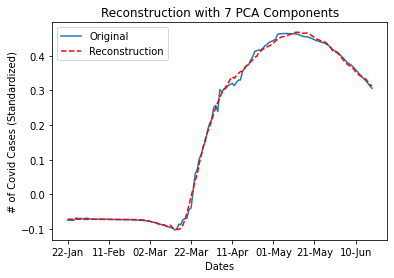

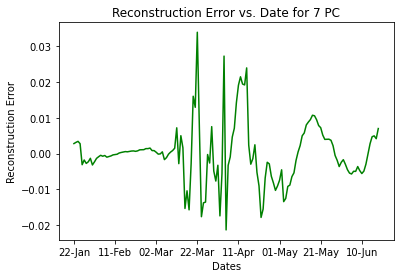

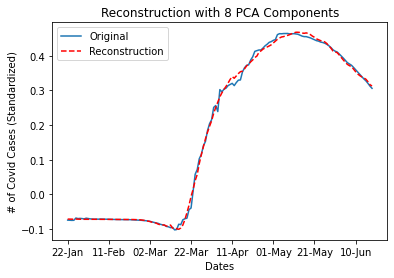

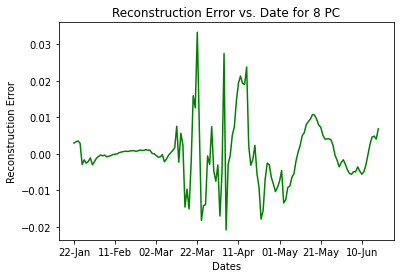

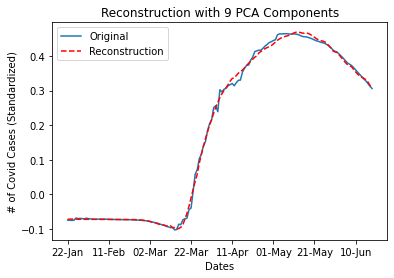

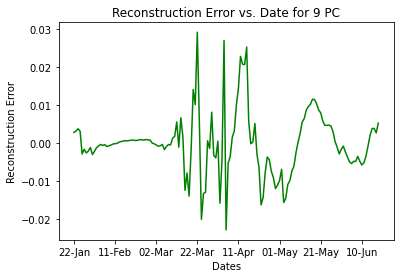

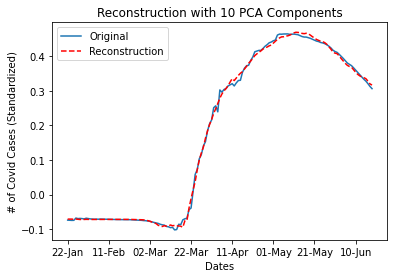

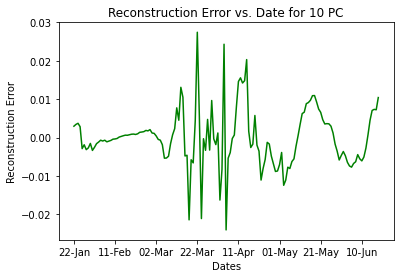

The number of PC needed to reach the goal RMSE is:  More than 10 PC needed


In [ ]:
country = "Canada"

rmse_value = plot_country_and_reconstruct(df_std, country)

# Return the number of PC needed to reach the RMSE goal 

print("The number of PC needed to reach the goal RMSE is: ", rmse_value)

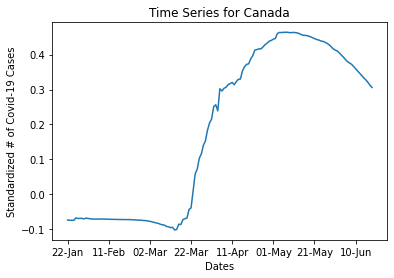

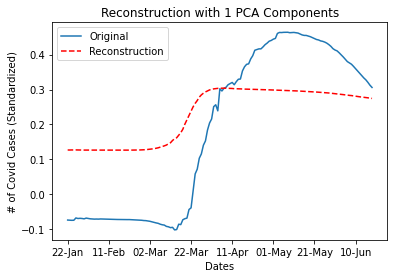

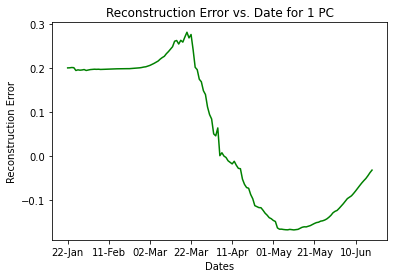

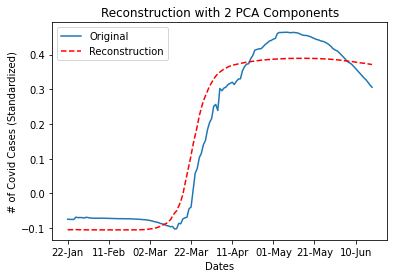

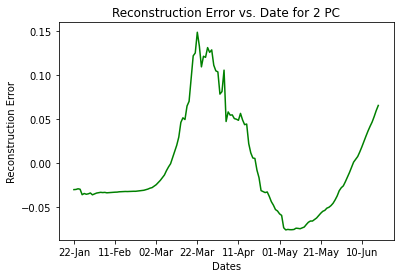

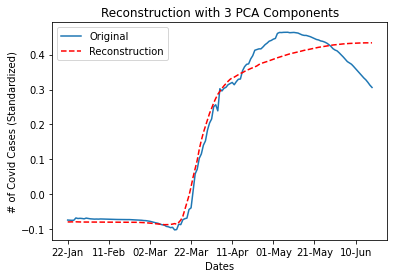

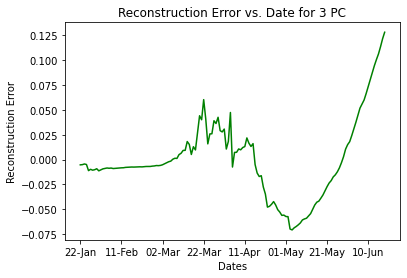

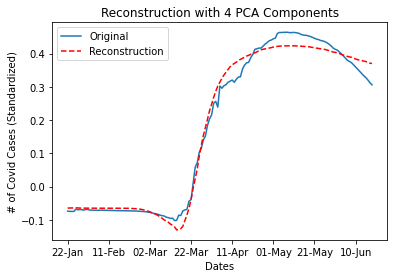

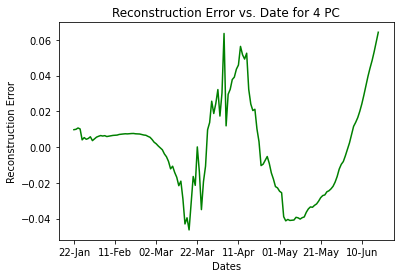

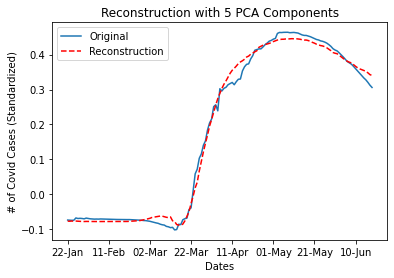

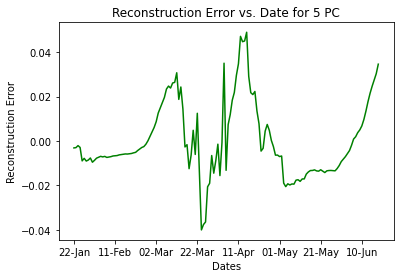

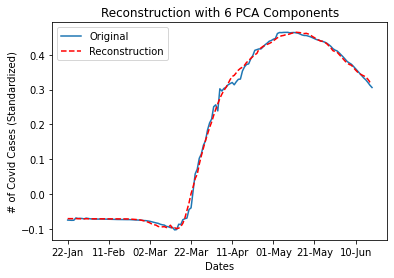

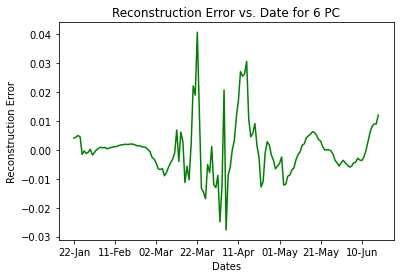

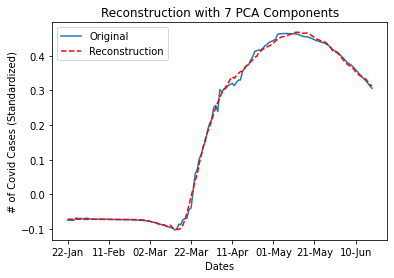

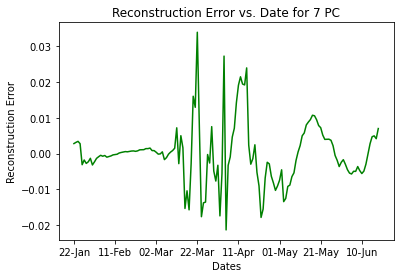

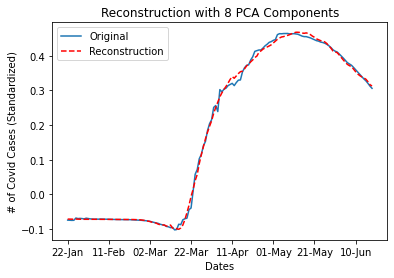

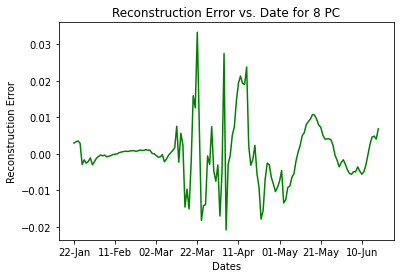

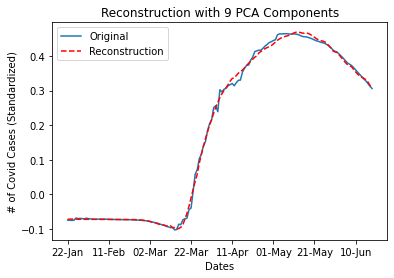

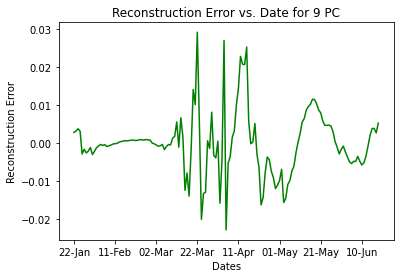

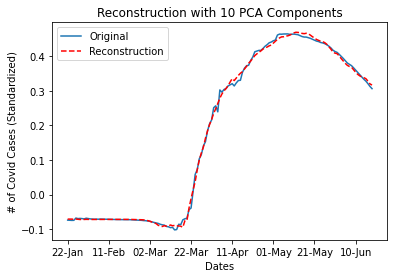

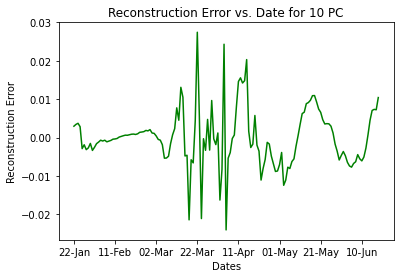

The number of PC needed to reach the goal RMSE is:  More than 10 PC needed


In [ ]:
country = "Canada"

rmse_value = plot_country_and_reconstruct(df_std, country)

# Return the number of PC needed to reach the RMSE goal 

print("The number of PC needed to reach the goal RMSE is: ", rmse_value)

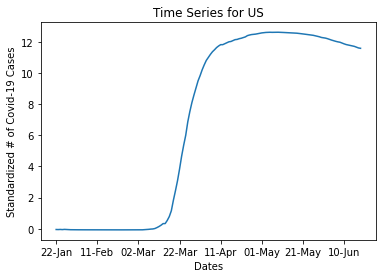

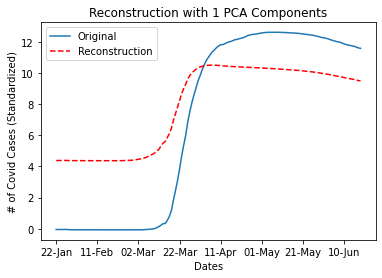

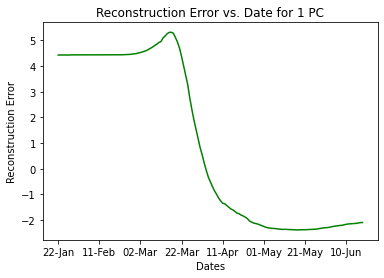

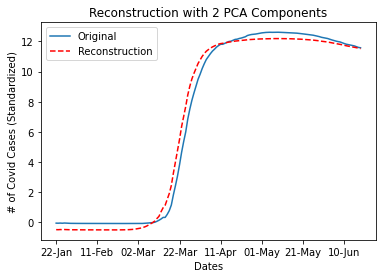

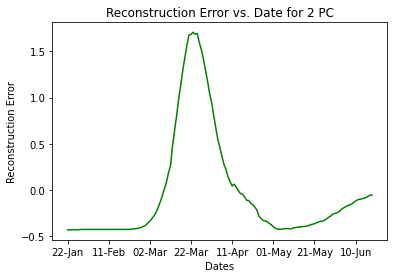

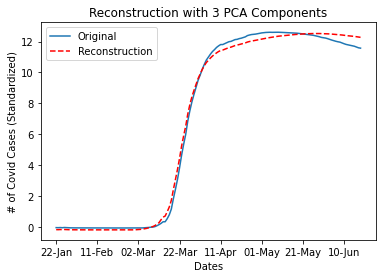

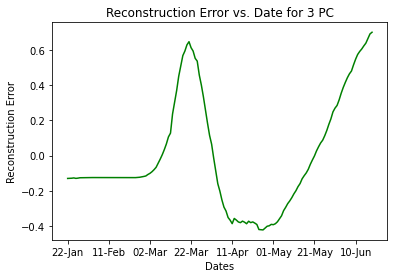

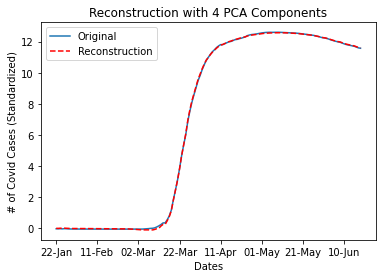

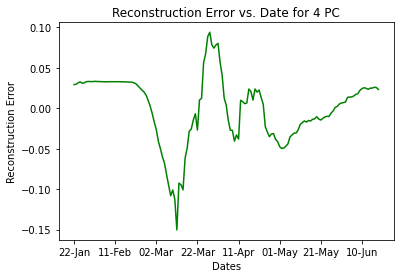

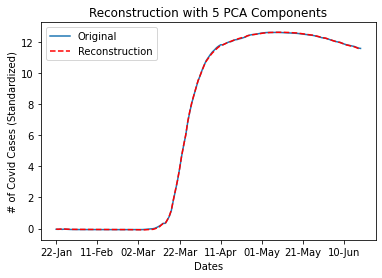

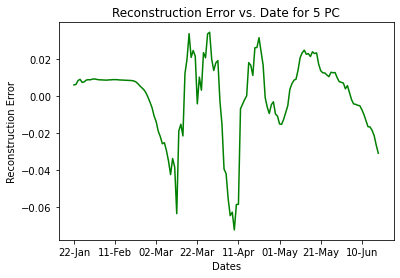

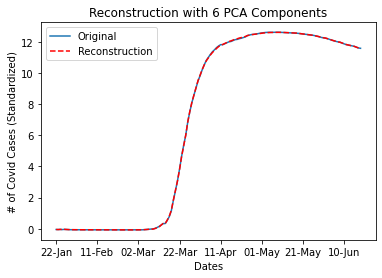

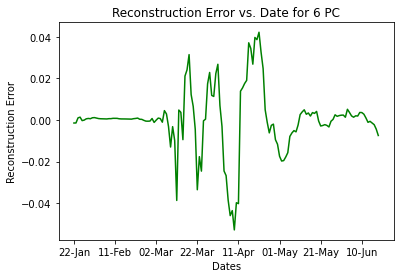

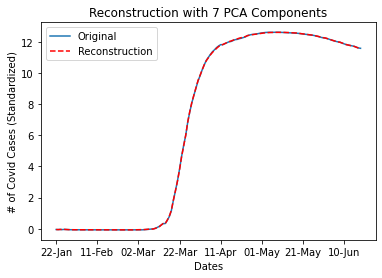

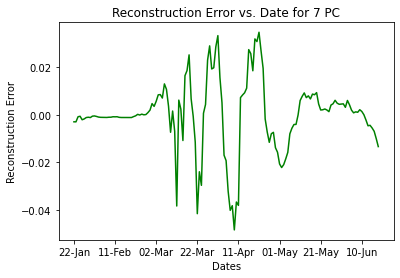

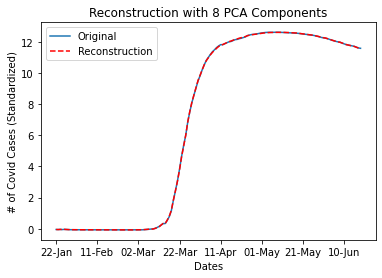

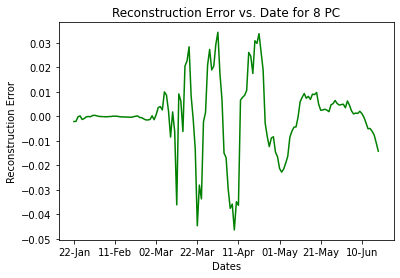

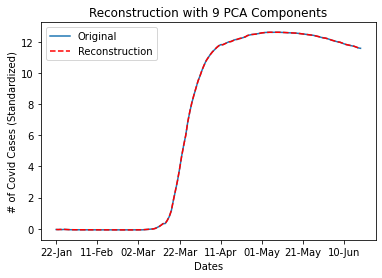

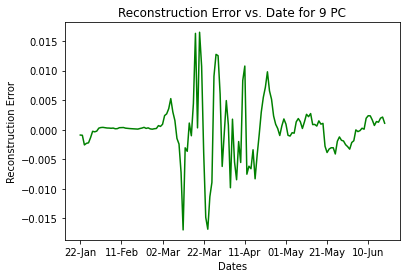

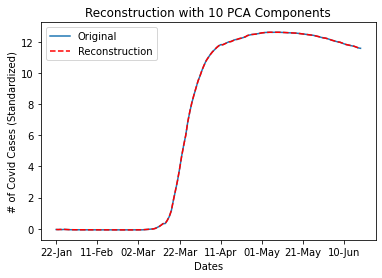

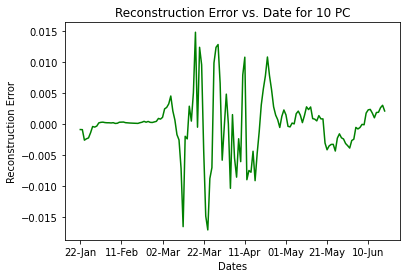

The number of PC needed to reach the goal RMSE is:  5


In [ ]:
country = "US"

rmse_value = plot_country_and_reconstruct(df_std, country)

# Return the number of PC needed to reach the RMSE goal 

print("The number of PC needed to reach the goal RMSE is: ", rmse_value)

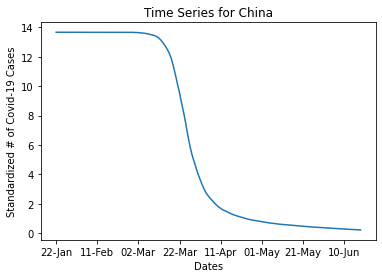

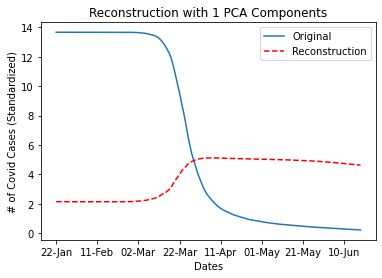

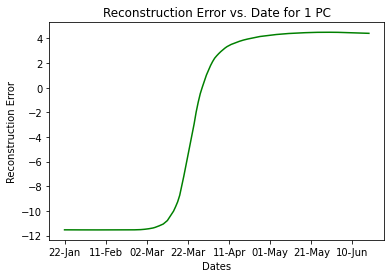

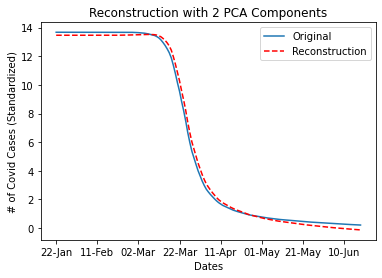

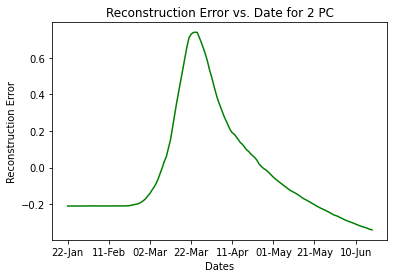

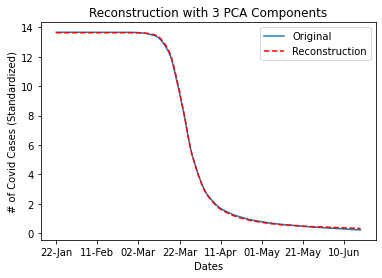

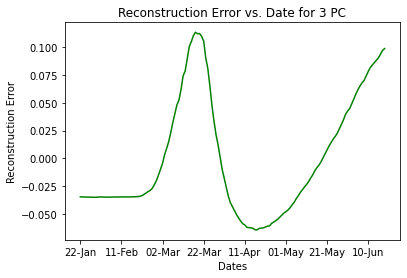

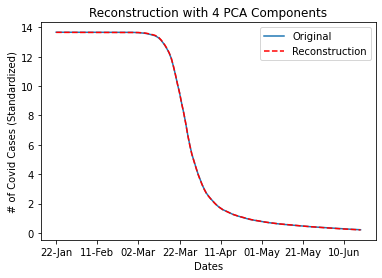

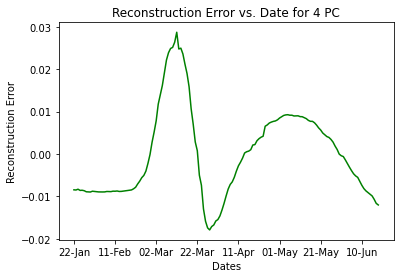

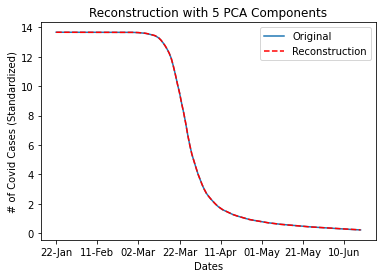

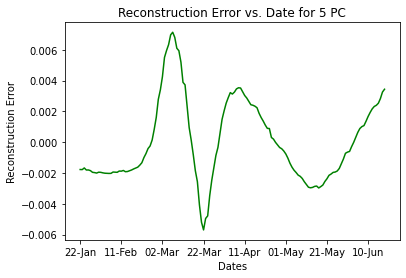

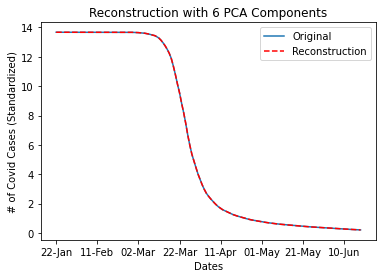

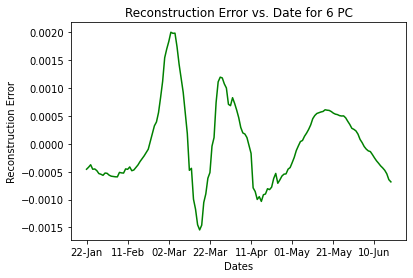

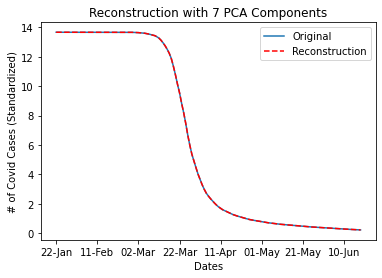

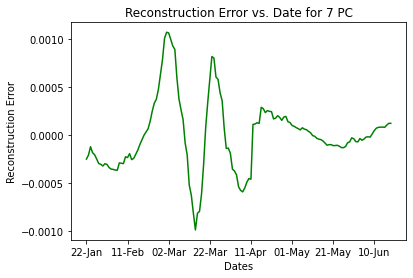

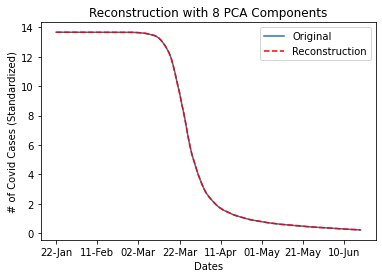

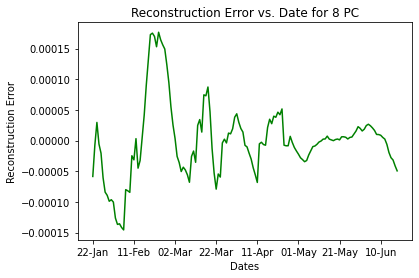

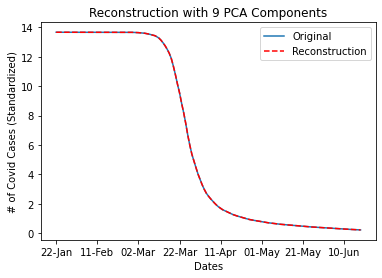

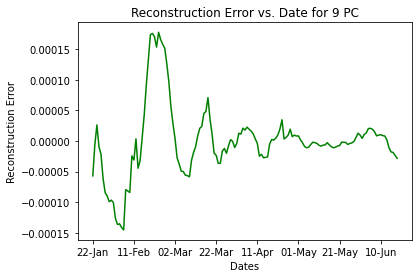

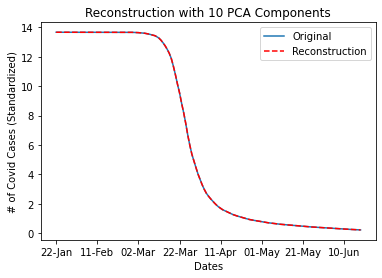

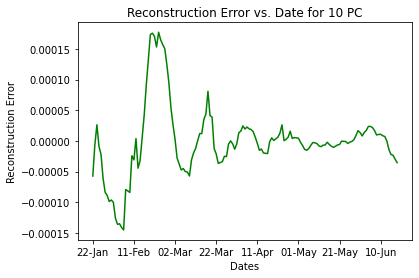

The number of PC needed to reach the goal RMSE is:  3


In [ ]:
country = "China"

rmse_value = plot_country_and_reconstruct(df_std, country)

# Return the number of PC needed to reach the RMSE goal 

print("The number of PC needed to reach the goal RMSE is: ", rmse_value)

# Part 4: Predicting the future! [4 Marks]
Come up with a way to estimate the number of new cases in the near future (like a week) using PCA.


*   One suggestion: You already saw that the first few PCs are the most useful ones and their trend is not that random! Try to predict the eigenvector values for the near future and reconstruct the data based on them. 

*   Also, you can look for ideas/methods online or come up with your own.

* Predict the total cases for `Canada`, `Brazil`, and `Russia` by June 25th. 

* You can check the statistics in here: `https://www.worldometers.info/coronavirus/` and see how much your estimations are close to reality. 

* Welcome to the Data science world!



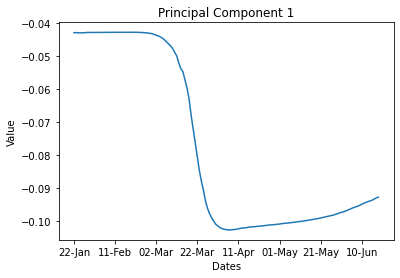

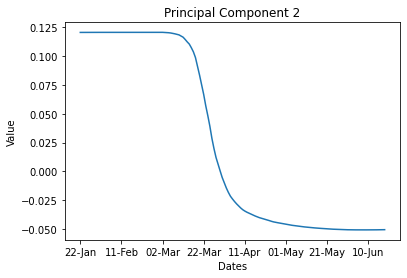

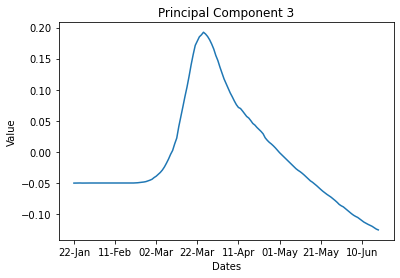

In [ ]:
# Simple way discussed in tutorial
# Fit the trends of the these PCA (end dates) and interpolate

top_3 = eigenvectors[:,0:3]

top_3_df = pd.DataFrame(top_3, index=df_std.columns)

for index, column in enumerate(top_3_df.columns):
  top_3_df[column].plot(x_compat=True)
  label = index + 1
  plt.title("Principal Component " + str(label))
  plt.xlabel("Dates")
  plt.ylabel("Value")
  plt.show()

In [ ]:
# I'm going to predict the next 20 days after the final date of the data set
from sklearn.linear_model import LinearRegression

# Take the linear portion of the data 
pc_1_data = top_3_df.loc["11-Apr":"10-Jun"][0].values

pc_lr_1 = LinearRegression() 

pc_lr_1.fit(np.array(range(1, pc_1_data.shape[0]+1)).reshape(-1,1), pc_1_data)

pc_1_predictions = pc_lr_1.predict(np.array(range(150, 157)).reshape(-1,1))

# PC appears to level out to a constant take that constant as value at 10-Jun
pc_2_data = top_3_df.loc["10-Jun"][1]

pc_2_predictions = [pc_2_data]*7

# Again another linear region (decreasing this time)
pc_3_data = top_3_df.loc["11-Apr":"10-Jun"][2].values

pc_lr_3 = LinearRegression() 

pc_lr_3.fit(np.array(range(1, pc_3_data.shape[0]+1)).reshape(-1,1), pc_3_data)

pc_3_predictions = pc_lr_3.predict(np.array(range(150, 157)).reshape(-1,1))

# Append the predictions to the matrix W and project the data back
append = np.column_stack((pc_1_predictions, pc_2_predictions, pc_3_predictions))

top_3_with_predictions = np.concatenate((top_3, append))

# Project back 
projection = np.dot(df_std.values, top_3)
reconstruction = np.dot(projection, top_3_with_predictions.T)

# Convert the reconstruction back to a dataframe

# Fix index
data_with_predictions = pd.DataFrame(reconstruction, index=df_std.index)

# Get the predictions for the relevant countries for each data

means_ = sc.mean_ 

means_reg = LinearRegression()

means_reg.fit(np.array(range(1, len(sc.mean_)+1)).reshape(-1,1), 
              means_.reshape(-1,1))

means_predicted = means_reg.predict(np.arange(150, 158).reshape(-1,1))

scales_ = sc.scale_

scales_reg = LinearRegression()

scales_reg.fit(np.array(range(1, len(sc.scale_)+1)).reshape(-1,1),
               scales_.reshape(-1,1))

scales_predicted = scales_reg.predict(np.arange(150,158).reshape(-1,1))

predicted_mean = means_predicted[-1]

predicted_scale = scales_predicted[-1]

# June 25th,this is last column
canada_prediction = (data_with_predictions.loc["Canada"][155]*predicted_scale)+predicted_mean
russia_prediction  = (data_with_predictions.loc["Russia"][155]*predicted_scale)+predicted_mean
brazil_prediction = (data_with_predictions.loc["Brazil"][155]*predicted_scale)+predicted_mean

print(canada_prediction)
print(russia_prediction)
print(brazil_prediction)

[127758.68636558]
[824721.84795124]
[1047981.16288378]


**Results: PC with scaling**

|  Country | Predicted Cases  | Real Cases | Percentage Difference |
|---|---|---|---|
| Canada  |  127759.0 |102622.0   | 19.6% | 
| Russia  |  824722.0 |  613994.0 | 25.6% |
| Brazil  | 1047982.0  | 1233147.0  | 17.7%|

This method appears to work fairly well (at least reasonable). However, it makes sense that it is >10% off as I used a very simple model to extrapolate new PCA components from existing ones (linear regression) as well as predicting variable mean and std to convert predicted dates back to actual cases instead of standardized # of cases.



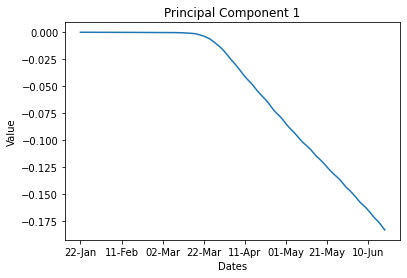

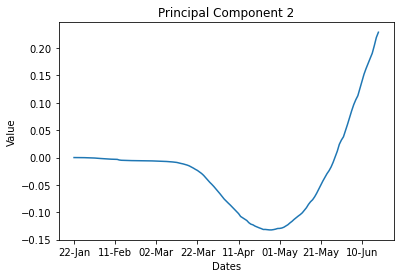

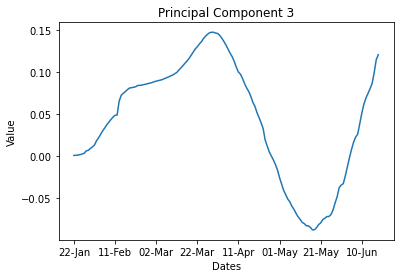

182969.0
1377558.0
2705660.0


In [ ]:
# Not using scaling because I can't figure out how to get unscaled results
# using PCA on the scaled matrix 

df_predict_cov = rawdf.cov()

eigenvalues, eigenvectors = np.linalg.eigh(df_predict_cov)

args = (-eigenvalues).argsort()
eigenvalues = eigenvalues[args]
eigenvectors = eigenvectors[:, args]

top_3 = eigenvectors[:,0:3]

top_3_df = pd.DataFrame(top_3, index=rawdf.columns)

for index, column in enumerate(top_3_df.columns):
  top_3_df[column].plot(x_compat=True)
  label = index + 1
  plt.title("Principal Component " + str(label))
  plt.xlabel("Dates")
  plt.ylabel("Value")
  plt.show()

# Take the linear portion of the data 
pc_1_data = top_3_df.loc["11-Apr":"10-Jun"][0].values

pc_lr_1 = LinearRegression() 

pc_lr_1.fit(np.array(range(1, pc_1_data.shape[0]+1)).reshape(-1,1), pc_1_data)

pc_1_predictions = pc_lr_1.predict(np.array(range(150, 158)).reshape(-1,1))

# PC appears to level out to a constant take that constant as value at 10-Jun
pc_2_data = top_3_df.loc["01-May":"10-Jun"][1]

pc_lr_2 = LinearRegression() 

pc_lr_2.fit(np.array(range(1, pc_2_data.shape[0]+1)).reshape(-1,1), pc_2_data)

pc_2_predictions = pc_lr_2.predict(np.array(range(150, 158)).reshape(-1,1))

# Again another linear region (decreasing this time)
pc_3_data = top_3_df.loc["21-May":"10-Jun"][2].values

pc_lr_3 = LinearRegression() 

pc_lr_3.fit(np.array(range(1, pc_3_data.shape[0]+1)).reshape(-1,1), pc_3_data)

pc_3_predictions = pc_lr_3.predict(np.array(range(150, 158)).reshape(-1,1))

# Append the predictions to the matrix W and project the data back

append = np.column_stack((pc_1_predictions, pc_2_predictions, pc_3_predictions))

top_3_with_predictions = np.concatenate((top_3, append))

# Project back 
projection = np.dot(rawdf.values, top_3)
reconstruction = np.dot(projection, top_3_with_predictions.T)

# Fix index
data_with_predictions = pd.DataFrame(reconstruction, index=df_std.index)

# Get the predictions for the relevant countries for each data

# June 25th,this is last column
canada_prediction = data_with_predictions.loc["Canada"][155]
russia_prediction  = data_with_predictions.loc["Russia"][155]
brazil_prediction = data_with_predictions.loc["Brazil"][155]

print(round(canada_prediction))
print(round(russia_prediction))
print(round(brazil_prediction))

**Results: PCA with no scaling**

|  Country | Predicted Cases  | Real Cases | Percentage Difference|
|---|---|---|---|
| Canada  |  182969.0 |102622.0   |  43.9% |
| Russia  |  1377558.0 |  613994.0 | 55.4% |
| Brazil  | 2705660.0  | 1233147.0  | 54.4% |

This is essentially double the real results. It makes sense that PCA performed worse without scaling. PCA is sensitive to differences in scale similarly to clustering techniques that rely on the Euclidean distance.

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


